# PROBLEM STATEMENT:
- BSA cycles a famous bicycle company has collected the data of sharing of bicycle for two consecutive years. With this data they want to do an analysis on how the sharing of the bicycle happens in different environmental and seasonal changes. Thereby, they even want to predict the sharing of the data for the upcoming year. Hence, the goal of the study is to build a system and come up with the prediction for the following year.

# OBJECTIVE:
- 1. To analyse different environmental conditions which are affecting the count of users for bicycle sharing.
- 2. To consider all the factors and come out with best features, which are related most with the users of bicycle sharing.
- 3. To give a clear view of the analysis to BSA Cycles, so that it can help the company to improve their bicycle sharing business.
- 4. To help BSA cycles with a prediction model based on the factors given for the upcoming year.

# HYPOTHESIS:
- Various hypothesis were taken into consideration while analysing each of the data features.

# PERFORMING EXPLORATORY DATA ANALYSIS:

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb

## Getting the dataset

In [2]:
data=pd.read_csv("day_lease.csv")
data.head()
# Checking the uploaded data

,item,dteday,spell,yr,mnth,sabbatical,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cas,reg,cnt
0,1,01-01-11,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-11,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-11,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-11,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-11,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data.shape

(731, 16)

In [4]:
data.size

11696

## Checking for null values

In [5]:
data.isnull().any()
# There are no null values

item          False
dteday        False
spell         False
yr            False
mnth          False
sabbatical    False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
cas           False
reg           False
cnt           False
dtype: bool

## Feature Analysis

In [6]:
# Showing all the column names
data.columns

Index(['item', 'dteday', 'spell', 'yr', 'mnth', 'sabbatical', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cas',
       'reg', 'cnt'],
      dtype='object')

In [7]:
data['dteday'].dtype

dtype('O')

In [8]:
# Converting the dteday column from string to date time format
data['dteday']=pd.to_datetime(data['dteday'])
data['dteday'].head()

0   2011-01-01
1   2011-02-01
2   2011-03-01
3   2011-04-01
4   2011-05-01
Name: dteday, dtype: datetime64[ns]

In [9]:
pd.DatetimeIndex(data['dteday']).year.value_counts()

2012    366
2011    365
Name: dteday, dtype: int64

In [10]:
data['yr'].value_counts()

1    366
0    365
Name: yr, dtype: int64

In [11]:
data['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64

In [12]:
data['spell'].unique()
# 1:springer, 2:summer, 3:fall, 4:winter

array([1, 2, 3, 4], dtype=int64)

In [13]:
# Mean Count of bicycles rented during each season
season=data.groupby('spell')['cnt'].mean().reset_index()
season.columns=['Season','Mean Count']
season['Season']=['Springer','Summer','Fall','Winter']
season

,Season,Mean Count
0,Springer,2604.132597
1,Summer,4992.331522
2,Fall,5644.303191
3,Winter,4728.162921


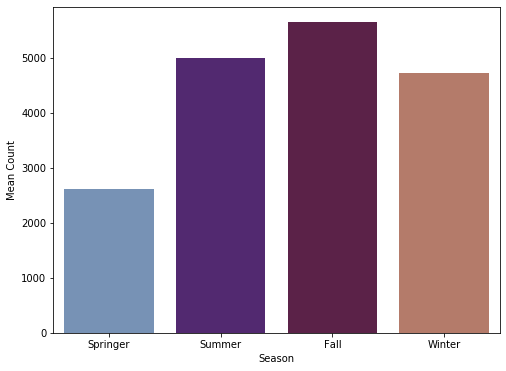

In [14]:
plt.figure(figsize=(8,6))
sb.barplot(season['Season'],season['Mean Count'],palette='twilight')
# This shows that maximum bicycles were shared in the Fall season

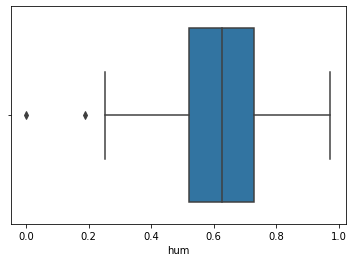

In [15]:
# Checking for outliers
sb.boxplot(data['hum'])

In [16]:
# Defining a function to remove the outliers
def outliers(name):
    q1=data[name].quantile(0.25)
    q3=data[name].quantile(0.75)
    iqr=q3-q1
    ub=q3+(iqr*1.5)
    lb=q1-(iqr*1.5)
    data[name]=data[name].replace(data[data[name]<lb][name],data[name].quantile(0.01))
    data[name]=data[name].replace(data[data[name]>ub][name],data[name].quantile(0.99))

In [17]:
outliers('hum')

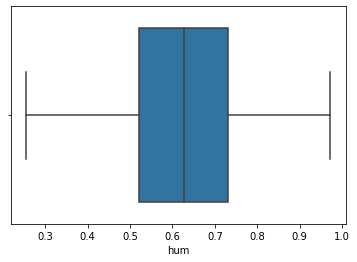

In [18]:
sb.boxplot(data['hum'])

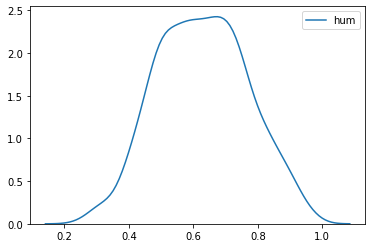

In [19]:
sb.kdeplot(data['hum'])

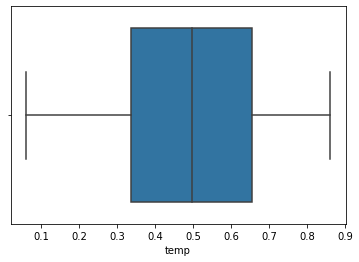

In [20]:
sb.boxplot(data['temp'])
# Normalised data

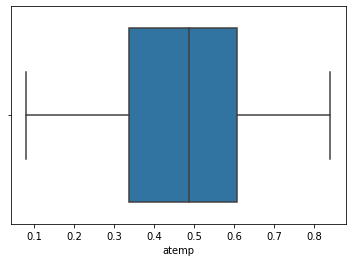

In [21]:
sb.boxplot(data['atemp'])
# Right Skewed data

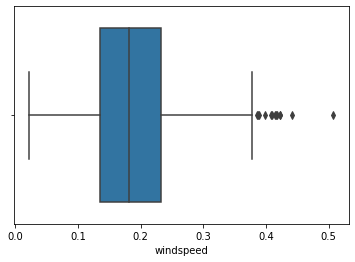

In [22]:
sb.boxplot(data['windspeed'])
# Outliers in windspeed column

In [23]:
# Removing outliers
outliers('windspeed')

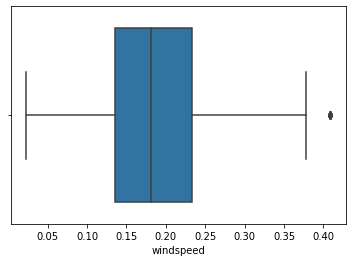

In [24]:
sb.boxplot(data['windspeed'])

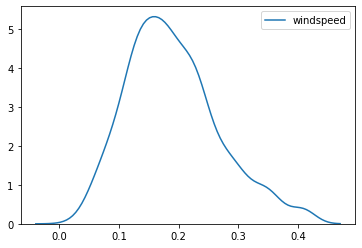

In [25]:
# Probability Density Curve
sb.kdeplot(data['windspeed'])

## Applying ANOVA on spell(season) and cnt to check the dependency of season on the number of bicycles rented
- NULL HYPOTHESES: mean number of bicycles rented for all seasons are equal
- ALTERNATE HYPOTHESES: mean number of bicycles rented for all seasons are not equal

In [26]:

f_oneway(data[data['spell']==1]['cnt'],data[data['spell']==2]['cnt'],data[data['spell']==3]['cnt'],data[data['spell']==4]['cnt'])

# p value is very less than 0.05, so null hypotheses is rejected meaning that there is different number of bicycles
# rented through all seasons


F_onewayResult(statistic=128.76962156570784, pvalue=6.720391362913176e-67)

In [27]:
# plt.figure(figsize=(8,6))
# sb.barplot(data['spell'],data['cnt'],palette='winter')
# plt.xlabel("Season")
# plt.ylabel("Count of Bikes rented")
# # plt.bar(data['spell'],data['cnt'])
# # set_xticklabels(['Spring','Summer','Fall','Winter'])

In [28]:
data['sabbatical'].value_counts()

0    710
1     21
Name: sabbatical, dtype: int64

In [29]:
# How many bicycle was rented on a holiday?
total_sab=data.groupby('sabbatical')['cnt'].sum().reset_index()
total_sab.columns=['Sabbatical','Count']
total_sab
# More number of bicycles are shared when there is no holiday
# The count of bicycles also increases from 2011 to 2012

,Sabbatical,Count
0,0,3214244
1,1,78435


In [30]:
data['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

In [31]:
total_workday=data.groupby('workingday')['cnt'].sum().reset_index()
total_workday.columns=['Working Day','Count']
total_workday
# More number of bicycles were rented on working days

,Working Day,Count
0,0,1000269
1,1,2292410


In [32]:
data['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [33]:
data[data['workingday']==1]['weekday'].unique()
# This shows that working days are from Monday to Friday(1 to 5)
# As filtering weekdays for which working days = 1

array([1, 2, 3, 4, 5], dtype=int64)

In [36]:
total_weekday=data.groupby('weekday')['cnt'].mean().reset_index()
total_weekday.columns=['Weekday','Mean Count']
total_weekday['Weekday']=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
# total_weekday

,Weekday,Mean Count
5,Friday,4690.288462


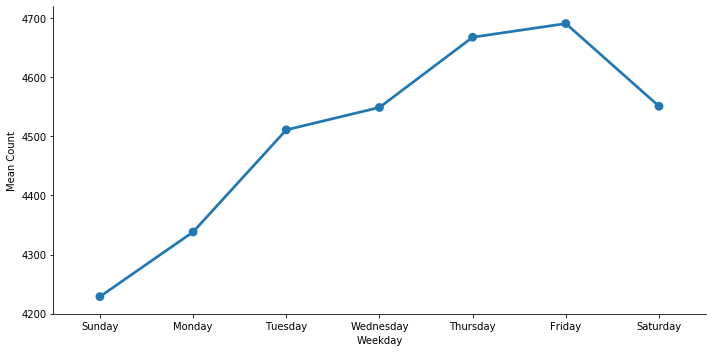

In [37]:
sb.catplot(x = 'Weekday', y = 'Mean Count', data = total_weekday, kind = 'point', aspect = 2)
total_weekday[total_weekday['Mean Count']==max(total_weekday['Mean Count'])]
# Maximum number of bicycles were rented on Friday's

In [38]:
data[data['sabbatical']==1][['sabbatical','weekday','workingday']].head()
# We can see that when sabbatical=1, then working day=0 (be it any day of the week)

,sabbatical,weekday,workingday
16,1,1,0
51,1,1,0
104,1,5,0
149,1,1,0
184,1,1,0


In [39]:
data[data['sabbatical']==0][['sabbatical','weekday','workingday']].head()

,sabbatical,weekday,workingday
0,0,6,0
1,0,0,0
2,0,1,1
3,0,2,1
4,0,3,1


- When sabbatical=0,working day=1 for weekdays 1-5(Monday to Friday working) and working day=0  for weekday 0,6(Saturday,Sunday)
- So we can see that working day is explaining the count most among sabbatical,weekdays and workingday 

## Applying CHI SQUARE test on categorical variables
- Looking for dependency for sabbatical and working day
- NULL HYPOTHESES: Sabbatical and working day are independent
- ALTERNATE HYPOTHESES: Sabatical and working day are not independent

In [40]:
table=pd.crosstab(index=data['workingday'],columns=data['sabbatical'])
chi2_contingency(table)

# p value < 0.05 so null hypotheses is rejected implying that sabbatical and working day are depending on each other

(43.597582013146706,
 4.033370935452143e-11,
 1,
 array([[224.36388509,   6.63611491],
        [485.63611491,  14.36388509]]))

In [41]:
data['weathersit'].unique()
# 1. Clear, 2- Mist, 3- Light Snow, 4- Heavy Rain

array([2, 1, 3], dtype=int64)

In [42]:
# Mean count of bicycles rented in different seasons
weather=data.groupby('weathersit')['cnt'].mean().reset_index()
weather.columns=['Weather','Mean Count']
weather['Weather']=['Clear','Mist','Light Snow']
weather

,Weather,Mean Count
0,Clear,4876.786177
1,Mist,4035.862348
2,Light Snow,1803.285714


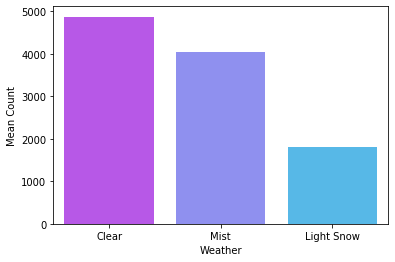

In [43]:
sb.barplot(weather['Weather'],weather['Mean Count'],palette='cool_r')
# Under Clear weather conditions bicycle renting is more

In [44]:
season_weather=data.groupby(['spell','weathersit'])['cnt'].sum().reset_index()
season_weather.columns=['Season','Weather','Count']
season_weather

,Season,Weather,Count
0,1,1,312036
1,1,2,155573
2,1,3,3739
3,2,1,626986
4,2,2,288096
5,2,3,3507
6,3,1,799443
7,3,2,250679
8,3,3,11007
9,4,1,519487


([<matplotlib.axis.XTick at 0x260a43eab00>,
 <a list of 4 Text xticklabel objects>)

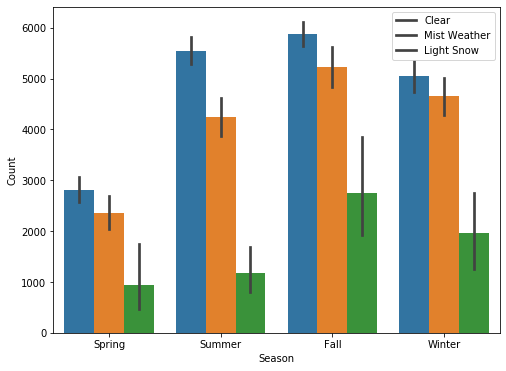

In [45]:
# plotting graph for season weather sit and count
plt.figure(figsize=(8,6))
sb.barplot(data['spell'],data['cnt'],hue=data['weathersit'],)
plt.legend(loc='upper left')
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend(['Clear','Mist Weather','Light Snow'], facecolor = "inherit")
plt.xticks(np.arange(4),('Spring', 'Summer', 'Fall', 'Winter'))

## Applying ANOVA on weathersit(weather conditions) and cnt to check the dependency of weather conditions on the number of bicycles rented
- NULL HYPOTHESES: mean number of bicycles rented for all weather conditions are equal
- ALTERNATE HYPOTHESES: mean number of bicycles rented for all weather conditions are not equal

In [46]:
f_oneway(data[data['weathersit']==1]['cnt'],data[data['weathersit']==2]['cnt'],data[data['weathersit']==3]['cnt'])

# p value is very less than 0.01, so null hypotheses is rejected meaning that there is different number of bicycles
# rented through all weather conditions


F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)

([<matplotlib.axis.XTick at 0x260a4459080>,
 <a list of 3 Text xticklabel objects>)

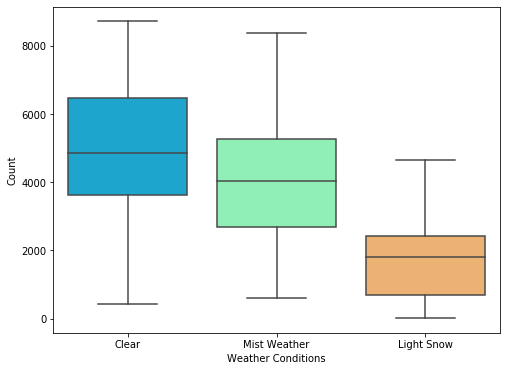

In [47]:
plt.figure(figsize=(8,6))
sb.boxplot(data['weathersit'],data['cnt'],palette='rainbow')
plt.xlabel("Weather Conditions")
plt.ylabel("Count")
plt.xticks(np.arange(3),('Clear', 'Mist Weather', 'Light Snow'))

([<matplotlib.axis.YTick at 0x260a4556a90>,
 <a list of 4 Text yticklabel objects>)

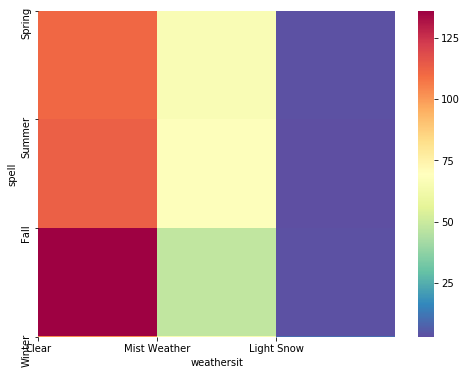

In [48]:
plt.figure(figsize=(8,6))
sb.heatmap(pd.crosstab(index=data['spell'],columns=data['weathersit']),cmap='Spectral_r')
plt.xticks(np.arange(3), ('Clear','Mist Weather','Light Snow'))
plt.yticks(np.arange(4), ('Spring','Summer','Fall','Winter'))
# This heatmap shows the which weather condition prevails the most during each season.

In [50]:
month_weekday=data.groupby(['mnth','weekday'])['cnt'].sum().reset_index()
month_weekday.columns=['Month','Weekday','Count']
# month_weekday

In [51]:
# Calculating that weekday of each month having maximum count
k=[]
b=[]
for i in range(1,13):
    month_max=month_weekday[month_weekday['Month']==i]['Count'].max()
    k.append(month_max)
    day=month_weekday[(month_weekday['Month']==i) & (month_weekday['Count']==month_max)]['Weekday']
    n=dict(day)
    b.append(list(n.values()))
print("Maximum count for a day in each month")
print(k)
print("Weekday")
print(b)

Maximum count for a day in each month
[23110, 25320, 38170, 40642, 53034, 57094, 52981, 60769, 57543, 49543, 40713, 33682]
Weekday
[[2], [3], [4], [1], [4], [6], [0], [3], [6], [3], [5], [5]]


In [52]:
# making list 'b' a single list
day=[]
for i in (b):
    for a in i:
        day.append(a)

In [53]:
# Table shows that which weekday experienced the maximum count of users for each month for both years combined
maxday=pd.DataFrame()
maxday['Month']=['January','February','March','April','May','June','July','August','September','October','November','December']
maxday['Weekday']=day
maxday['Maximum Count']=k
days = {0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: "Saturday"}
maxday['Weekday'] = maxday['Weekday'].map(days)
maxday

,Month,Weekday,Maximum Count
0,January,Tuesday,23110
1,February,Wednesday,25320
2,March,Thursday,38170
3,April,Monday,40642
4,May,Thursday,53034
5,June,Saturday,57094
6,July,Sunday,52981
7,August,Wednesday,60769
8,September,Saturday,57543
9,October,Wednesday,49543


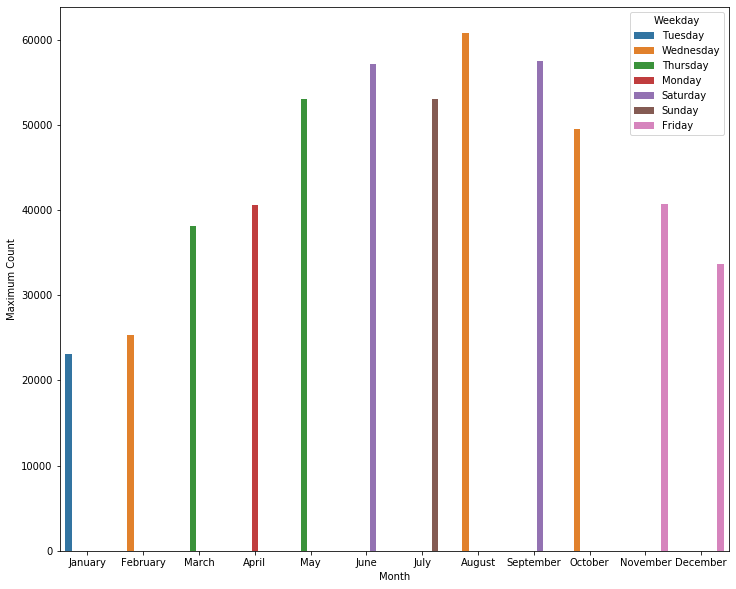

In [54]:
plt.figure(figsize = (12,10))
sb.barplot(maxday['Month'], maxday['Maximum Count'], hue = maxday['Weekday'])

In [55]:
# Months for which each season lasts
spring=data[data['spell']==1][['mnth','cnt']]
summer=data[data['spell']==2][['mnth','cnt']]
fall=data[data['spell']==3][['mnth','cnt']]
winter=data[data['spell']==4][['mnth','cnt']]

In [57]:
c = ["Spring","Summer","Fall", "Winter"]
a= 0 
for season in [spring, summer, fall, winter]:
    df = season.groupby('mnth')['cnt'].sum().reset_index()
    df.columns=['Month','Count']
    months = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
    df['Month'] = df['Month'].map(months)
    print("Months falling under " + c[a] + " season are:")
    print(df)
    print("Count of Bicycles rented in {} season: {}".format(c[a],df['Count'].sum()))
    print('*'*100)
    a+=1

Months falling under Spring season are:
      Month   Count
0   January  134933
1  February  151352
2     March  142065
3  December   42998
Count of Bicycles rented in Spring season: 471348
****************************************************************************************************
Months falling under Summer season are:
   Month   Count
0  March   86855
1  April  269094
2    May  331686
3   June  230954
Count of Bicycles rented in Summer season: 918589
****************************************************************************************************
Months falling under Fall season are:
       Month   Count
0       June  115388
1       July  344948
2     August  351194
3  September  249599
Count of Bicycles rented in Fall season: 1061129
****************************************************************************************************
Months falling under Winter season are:
       Month   Count
0  September   96392
1    October  322352
2   November  254831
3   December  16

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

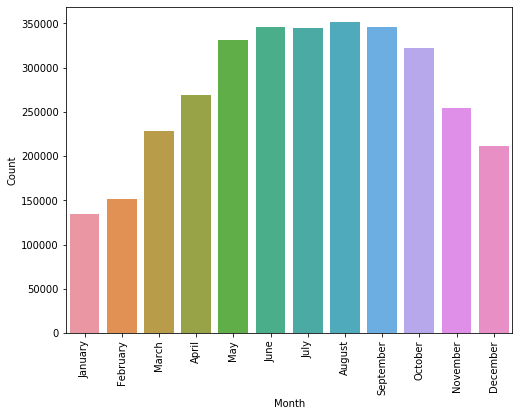

In [58]:
mnth_cnt=data.groupby('mnth')['cnt'].sum().reset_index()
mnth_cnt.columns=['Month','Count']
mnth_cnt['Month']=['January','February','March','April','May','June','July','August','September','October','November','December']
mnth_cnt
plt.figure(figsize=(8,6))
sb.barplot(mnth_cnt['Month'],mnth_cnt['Count'])
plt.xticks(rotation=90)
# It can be seen that June,July, August and September is the period of Fall season with maximum number of users

## Checking the variation in 2011 and 2012

### For 2011

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

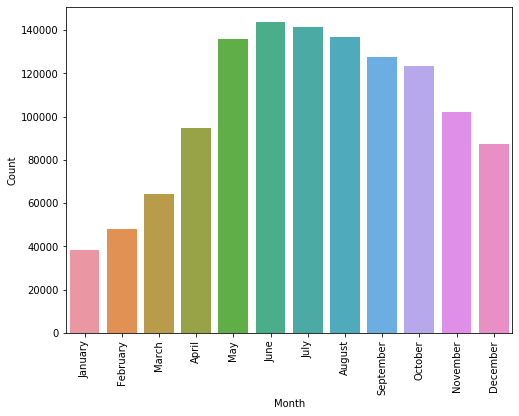

In [59]:
data1=data[data['yr']==0][['spell','mnth','cnt']]
mnth_cnt2011=data1.groupby('mnth')['cnt'].sum().reset_index()
mnth_cnt2011.columns=['Month','Count']
mnth_cnt2011['Month']=['January','February','March','April','May','June','July','August','September','October','November','December']
mnth_cnt2011
plt.figure(figsize=(8,6))
sb.barplot(mnth_cnt2011['Month'],mnth_cnt2011['Count'])
plt.xticks(rotation=90)

In [60]:
# Seperating all the seasons for the year 2011
spring2011=data1[data1['spell']==1][['mnth','cnt']]
summer2011=data1[data1['spell']==2][['mnth','cnt']]
fall2011=data1[data1['spell']==3][['mnth','cnt']]
winter2011=data1[data1['spell']==4][['mnth','cnt']]

In [65]:
# Counting the bicycles rented for spring season in 2011
spr2011=spring2011.groupby('mnth')['cnt'].sum().reset_index()
spr2011.columns=['Month','Count']
s2011=spr2011['Count'].sum()

In [66]:
# Counting the bicycles rented for summer season in 2011
smr2011=summer2011.groupby('mnth')['cnt'].sum().reset_index()
smr2011.columns=['Month','Count']
sr2011=smr2011['Count'].sum()

In [67]:
# Counting the bicycles rented for fall season in 2011
fl2011=fall2011.groupby('mnth')['cnt'].sum().reset_index()
fl2011.columns=['Month-Fall','Count']
# fl2011['Month-Fall']=['June','July','August','Septemer']
f2011=fl2011['Count'].sum()

In [68]:
# Counting the bicycles rented for winter season in 2011
wntr2011=winter2011.groupby('mnth')['cnt'].sum().reset_index()
wntr2011.columns=['Month','Count']
w2011=wntr2011['Count'].sum()

In [69]:
# Creating a dataframe having quater wise count of bicycles
quarter_count=pd.DataFrame()
quarter_count['Quarter']=['1','2','3','4']
quarter_count['Count-2011']=[s2011,sr2011,f2011,w2011]
quarter_count

,Quarter,Count-2011
0,1,150000
1,2,347316
2,3,419650
3,4,326137


### For 2012

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

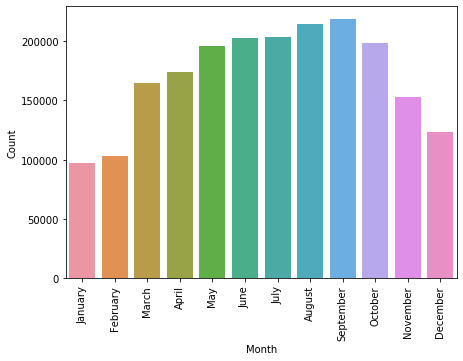

In [75]:
data2=data[data['yr']==1][['spell','mnth','cnt']]
mnth_cnt2012=data2.groupby('mnth')['cnt'].sum().reset_index()
mnth_cnt2012.columns=['Month','Count']
mnth_cnt2012['Month']=['January','February','March','April','May','June','July','August','September','October','November','December']
mnth_cnt2012
plt.figure(figsize=(7,5))
sb.barplot(mnth_cnt2012['Month'],mnth_cnt2012['Count'])
plt.xticks(rotation=90)

In [77]:
# Seperating all the seasons for the year 2012
spring2012=data2[data2['spell']==1][['mnth','cnt']]
summer2012=data2[data2['spell']==2][['mnth','cnt']]
fall2012=data2[data2['spell']==3][['mnth','cnt']]
winter2012=data2[data2['spell']==4][['mnth','cnt']]

In [78]:
# Counting the bicycles rented for spring season in 2012
spr2012=spring2012.groupby('mnth')['cnt'].sum().reset_index()
spr2012.columns=['Month','Count']
s2012=spr2012['Count'].sum()

In [79]:
# Counting the bicycles rented for summer season in 2012
smr2012=summer2012.groupby('mnth')['cnt'].sum().reset_index()
smr2012.columns=['Month','Count']
sr2012=smr2012['Count'].sum()

In [80]:
# Counting the bicycles rented for fall season in 2012
fl2012=fall2012.groupby('mnth')['cnt'].sum().reset_index()
fl2012.columns=['Month-Fall','Count']
# fl2011['Month-Fall']=['June','July','August','Septemer']
f2012=fl2012['Count'].sum()

In [81]:
# Counting the bicycles rented for winter season in 2012
wntr2012=winter2012.groupby('mnth')['cnt'].sum().reset_index()
wntr2012.columns=['Month','Count']
w2012=wntr2012['Count'].sum()

In [82]:
# Adding quarter wise sale for the year 2012 also
quarter_count['Count-2012']=[s2012,sr2012,f2012,w2012]
quarter_count

,Quarter,Count-2011,Count-2012
0,1,150000,321348
1,2,347316,571273
2,3,419650,641479
3,4,326137,515476


In [129]:
# Percentage increase in sales for the quarters in 2011 and 2012
quarter_count['Percentage Increase']=((quarter_count['Count-2012']-quarter_count['Count-2011'])/quarter_count['Count-2011'])*100
quarter_count['Percentage Increase']=np.round(quarter_count['Percentage Increase'],2)
quarter_count

,Quarter,2011,2012,Percentage Increase
0,1,150000,321348,114.23
1,2,347316,571273,64.48
2,3,419650,641479,52.86
3,4,326137,515476,58.06


Text(0, 0.5, 'Count')

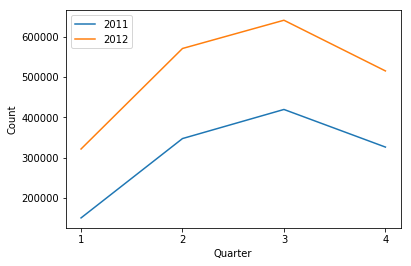

In [142]:
# Plotting graph for the count in the the year 2011 and 2012
plt.plot(quarter_count['Quarter'],quarter_count['2011'])
plt.plot(quarter_count['Quarter'],quarter_count['2012'])
plt.legend()
plt.xlabel("Quarter")
plt.ylabel("Count")

### There is good percentage increase in business in the first quarter for the year 2012 as compared to 2011

In [83]:
year=data.groupby('yr')['cnt'].sum().reset_index()
year.columns=['Year','Count']
year['Year']=['2011','2012']
print(year)
((2049576-1243103)/1243103)*100
# There is approximately 65% increase in the number of users for BSA, which shows their business development strategies.

   Year    Count
0  2011  1243103
1  2012  2049576


64.87579870694545

Text(0, 0.5, 'Count of Bikes rented')

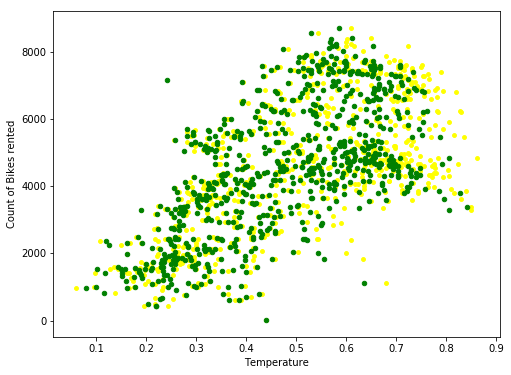

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(data['temp'],data['cnt'],color='yellow',s=15)
plt.scatter(data['atemp'],data['cnt'],color='green',s=20)
plt.xlabel("Temperature")
plt.ylabel("Count of Bikes rented")
# Scatter plot shows the high relation between temp and atemp, so to avoid redundancy, dropping atemp

In [84]:
data[['temp','atemp','hum','windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126260,-0.157767,0.627494
atemp,0.991702,1.000000,0.139590,-0.183663,0.631066
hum,0.126260,0.139590,1.000000,-0.241390,-0.109894
windspeed,-0.157767,-0.183663,-0.241390,1.000000,-0.233858
cnt,0.627494,0.631066,-0.109894,-0.233858,1.000000


- Now from the correlation it can be seen that temp and atemp is highly related, ie, we can drop atemp column to 
- avoid redundancy
- Humidity is inversely related to count, ie if humidity increases count decreases as humidity increases chances of rain
- and vice versa
- Same with windspeed, count decreases as windspeed increases

In [85]:
data[['temp','hum','windspeed','cnt']].corr()

,temp,hum,windspeed,cnt
temp,1.000000,0.126260,-0.157767,0.627494
hum,0.126260,1.000000,-0.241390,-0.109894
windspeed,-0.157767,-0.241390,1.000000,-0.233858
cnt,0.627494,-0.109894,-0.233858,1.000000


In [86]:
f_oneway(data[data['yr']==0]['cnt'],data[data['yr']==1]['cnt'])
# Year is highly related with the number of users

F_onewayResult(statistic=344.8905855356836, pvalue=2.4835399044509515e-63)

In [87]:
# Seperating all the independent and dependent variables
x=data[['yr','mnth','spell','workingday','weathersit','temp','hum','windspeed']]
x.head()

,yr,mnth,spell,workingday,weathersit,temp,hum,windspeed
0,0,1,1,0,2,0.344167,0.805833,0.160446
1,0,1,1,0,2,0.363478,0.696087,0.248539
2,0,1,1,1,1,0.196364,0.437273,0.248309
3,0,1,1,1,1,0.200000,0.590435,0.160296
4,0,1,1,1,1,0.226957,0.436957,0.186900


In [88]:
y=data['cnt']
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [89]:
# Splitting the data inot test set and the training set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [90]:
x_train.shape

(584, 8)

In [91]:
x_test.shape

(147, 8)

## Applying Linear Regression

In [92]:
# Creating the 'lr' object and fitting the model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
# Coefficients for each independent variable
lr.coef_

array([ 1966.97710613,   -28.72552764,   465.6091973 ,   111.93049927,
        -500.34414682,  5296.19010386, -1353.85345942, -3029.28214942])

In [94]:
# Intercept value
lr.intercept_

1970.0013501539493

In [95]:
# Testing the model with our test data
y_pred=lr.predict(x_test)

In [96]:
lr.score(x_train,y_train)*100

78.91850674110344

In [97]:
# Calculating the root mean squared error and coefficient of determination
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print("RMSE:",rmse)
print("R2:",r2)
# R2 value shows that 79.6% of the variation in dependent variable is explained by the independent variables

RMSE: 931.263869118688
R2: 0.7960914012139393


Text(0.5, 1.0, 'Residual Plot')

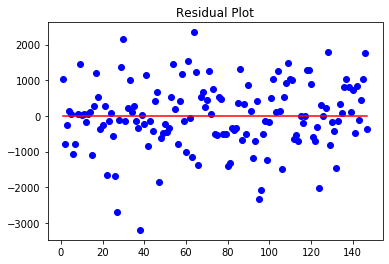

In [98]:
# Plotting residual plot
x=[i for i in range(1,len(y_pred)+1)]
plt.scatter(x,(y_test-y_pred),color='blue')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
# Since there is no pattern in the residual plot so it is a linear model